# Load and Show Image

In [5]:
import cv2
img = cv2.imread("mereliyetum1.jpg")
cv2.imshow("Image",img)
cv2.waitKey()

-1

# Extracting Region of Interest

In [3]:
roi = img[80:300,100:400]
cv2.imshow("ROI",roi)
cv2.waitKey()

-1

# Resizing

In [4]:
resized = cv2.resize(img,(200,200))
cv2.imshow("Resize",resized)
cv2.waitKey()

-1

# Resize with aspect ratio

In [14]:
img2 = cv2.imread("mereliyetum1.jpg")
(h,w,d) = img2.shape
r = 300.0/w
dim = (300,int(h*r))
resized = cv2.resize(img2,dim)
cv2.imshow("Resize",resized)
cv2.waitKey()

-1

# Rotating an Image

In [18]:
center = (w//2,h//2)
M = cv2.getRotationMatrix2D(center,-45,+1.0)
rotated = cv2.warpAffine(img2,M,(w,h))
cv2.imshow("Rotated",rotated)
cv2.waitKey()

-1

In [1]:
import imutils

In [11]:
rotated = imutils.rotate_bound(img2,-45)
cv2.imshow("Rotated",rotated)
cv2.waitKey()

-1

# Image Blending

In [ ]:
import cv2
img1 = cv2.imread('mereliyetum1.jpg')
img2 = cv2.imread('rose.jpg')

print (img1.shape)
print (img2.shape)

img2 = cv2.resize(img2,(580,396))
print(img2.shape)
dst = cv2.addWeighted(img1,0.7,img2,0.3,0)

cv2.imshow('dst',dst)
cv2.waitKey()
#cv2.destroyAllWindows()

(396, 580, 3)
(1415, 2120, 3)
(396, 580, 3)


In [30]:
def resizedimg(imgpath):
    img2 = cv2.imread(imgpath)
    (h,w,d) = img2.shape
    r = 200.0/w
    dim = (200,int(h*r))
    resized = cv2.resize(img2,dim)
    return (resized)

# bitwise operations

In [31]:
import cv2
#load images
img1 = cv2.imread('mereliyetum1.jpg')
img2p = 'python.png'
img2 = resizedimg(img2p)
#extract roi
rows,cols,channels = img2.shape
roi = img1[0:rows,0:cols]
#create mask and inverse mask
img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
ret,mask = cv2.threshold(img2gray,10,255,cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)
#blackout area of roi in img1
img1_bg = cv2.bitwise_and(roi,roi,mask = mask_inv)
#take area of roi from img2
img2_fg = cv2.bitwise_and(img2,img2,mask = mask)
#place logo on img1
dst = cv2.add(img1_bg,img2_fg)
img1[0:rows,0:cols] = dst
cv2.imshow("res",img1)
cv2.waitKey()

-1

# Object Tracking

In [3]:
import cv2
import numpy as np

frame = cv2.imread('frame.jpg')
# Convert BGR to HSV
while(1):
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    print (hsv)
    # define range of blue color in HSV
    lower_blue = np.array([110,50,50])
    upper_blue = np.array([130,255,255])

    # Threshold the HSV image to get only blue colors
    mask = cv2.inRange(hsv, lower_blue, upper_blue)

    # Bitwise-AND mask and original image
    res = cv2.bitwise_and(frame,frame, mask= mask)

    cv2.imshow('frame',frame)
    cv2.imshow('mask',mask)
cv2.imshow('res',res)
k = cv2.waitKey(5) & 0xFF
if k == 27:
    print (k)

#cv2.destroyAllWindows()
cv2.waitKey()

[[[  0   0 255]
  [  0   0 255]
  [  0   0 255]
  ...
  [  0   0 255]
  [  0   0 255]
  [  0   0 255]]

 [[  0   0 255]
  [  0   0 255]
  [  0   0 255]
  ...
  [  0   0 255]
  [  0   0 255]
  [  0   0 255]]

 [[  0   0 255]
  [  0   0 255]
  [  0   0 255]
  ...
  [  0   0 255]
  [  0   0 255]
  [  0   0 255]]

 ...

 [[  0   0 255]
  [  0   0 255]
  [  0   0 255]
  ...
  [  0   0 255]
  [  0   0 255]
  [  0   0 255]]

 [[  0   0 255]
  [  0   0 255]
  [  0   0 255]
  ...
  [  0   0 255]
  [  0   0 255]
  [  0   0 255]]

 [[  0   0 255]
  [  0   0 255]
  [  0   0 255]
  ...
  [  0   0 255]
  [  0   0 255]
  [  0   0 255]]]


-1

# Scaling

In [ ]:
import cv2
import numpy as np

img = cv2.imread('mereliyetum1.jpg')

#res = cv2.resize(img,None,fx=2, fy=2, interpolation = cv2.INTER_CUBIC)

#OR

scale_percent = 50
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)

res = cv2.resize(img,(width, height), interpolation = cv2.INTER_LINEAR)
cv2.imshow('image',img)
cv2.imshow('scaled',res)
cv2.waitKey()

# Transform

In [11]:
import cv2
import numpy as np
# read image
img = cv2.imread('mereliyetum1.jpg',1)
#take rows and cols
rows,cols = img.shape[:2]
cv2.imshow('image',img)
#transformation Matrix; tx = 100, ty = 100
M = np.float32([[1,0,100],[0,1,100]])
#transforming
dst = cv2.warpAffine(img,M,(cols,rows))
#show image
cv2.imshow('transformed',dst)
cv2.waitKey()


-1

# Rotation

In [ ]:
import cv2
import numpy as np
#read image
img = cv2.imread('mereliyetum1.jpg',1)
#take rows and columns
rows,cols = img.shape[:2]
#Rotation Matrix with respect to center
#rotating counterclockwise without scaling
M = cv2.getRotationMatrix2D((cols/2,rows/2),90,-1)
dst = cv2.warpAffine(img,M,(cols,rows))
#showing image
cv2.imshow('rotated',dst)
cv2.waitKey()

# Perspective Transform

In [14]:
import cv2
import numpy as np

#read image
img = cv2.imread('mereliyetum1.jpg',1)
#take rows and columns
rows,cols,ch = img.shape

pts1 = np.float32([[56,65],[368,82],[18,387],[389,290]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])
#Transformation Matrix
M = cv2.getPerspectiveTransform(pts1,pts2)
#Applying perspective function
dst = cv2.warpPerspective(img,M,(300,300))
#display image
cv2.imshow('Image',img)
cv2.imshow('Perspective',dst)

cv2.waitKey()

-1

# Image Blurring

In [6]:
import cv2
import numpy as np

img = cv2.imread('mereliyetum1.jpg')

blur = cv2.blur(img,(5,5))
gaussian = cv2.GaussianBlur(img,(5,5),0)
median = cv2.medianBlur(img,5)
bilateral = cv2.bilateralFilter(img,9,75,75)
cv2.imshow('blur',blur)
cv2.imshow('gaussion',gaussian)
cv2.imshow('median',median)
cv2.imshow('bilateral',bilateral)
cv2.waitKey()

-1

# Morphological transformations

## Erosion

In [5]:
import cv2
import numpy as np

img = cv2.imread('j.png',0)
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(img,kernel,iterations = 1)
cv2.imshow("Image",img)
cv2.imshow("erosion",erosion)
cv2.waitKey()

-1

## Dilation

In [ ]:
import cv2
import numpy as np

img = cv2.imread('j.png',0)
kernel = np.ones((5,5),np.uint8)
dilation = cv2.dilate(img,kernel,iterations = 1)
cv2.imshow("Image",img)
cv2.imshow("dilation",dilation)
cv2.waitKey()

# Opening

In [4]:
import cv2
import numpy as np
#read image
img = cv2.imread('jnoise.png',0)
kernel = np.ones((5,5),np.uint8)

opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
cv2.imshow("Image",img)
cv2.imshow("opening",opening)
cv2.waitKey()

-1

# Closing

In [ ]:
import cv2
import numpy as np
#read image
img = cv2.imread('jnoise2.png',0)
kernel = np.ones((5,5),np.uint8)
#dilation followed by erosion
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
cv2.imshow("Image",img)
cv2.imshow("closing",closing)
cv2.waitKey()


# Canny Edge detection

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
# read image
img = cv2.imread('mereliyetum1.jpg',0)
# set edges 
# Canny(image,minimum value, maximum value)
edges = cv2.Canny(img,80,200)
# Showing images 
cv2.imshow("image",img)
cv2.imshow("edges",edges)
cv2.waitKey()

# Contours

In [16]:
import cv2
#read image
img = cv2.imread('j.png')
#take grayscales
imgray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(imgray,127,255,0)
#find contours
contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
# use 0th contour
cnt = contours[0]
#draw contour
img2 = cv2.drawContours(img, [cnt], 0, (0,255,255), 3)
#show images

cv2.imshow("Contours",img2)
cv2.waitKey()


-1

# Histogram

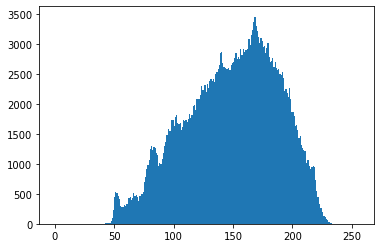

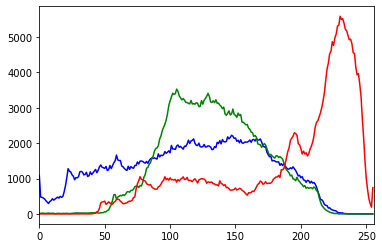

-1

In [11]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('flowers.jpg',0)

plt.hist(img.ravel(),256,[0,256]); plt.show()
color = ('b','g','r')
img = cv2.imread('flowers.jpg')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])

plt.show()
cv2.imshow("Image",img)
cv2.waitKey()

# Histogram Equalizer

In [20]:
import cv2
#read image in grayscale
img = cv2.imread('mereliyetum1.jpg',0)
#equalize hist
equ = cv2.equalizeHist(img)
#show images
cv2.imshow('Image',img)
cv2.imshow('Equalised',equ)
cv2.waitKey()

-1

# CLAHE (Contrast Limited Adaptive Histogram Equalization)

In [ ]:
import numpy as np
import cv2
#read image in grayscale
img = cv2.imread('mereliyetum1.jpg',0)
# create a CLAHE object (Arguments are optional).
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
#apply clahe to image
cl1 = clahe.apply(img)
#show images
cv2.imshow("Image",img)
cv2.imshow('clahe_2.jpg',cl1)
cv2.waitKey()

# 2D Histogram

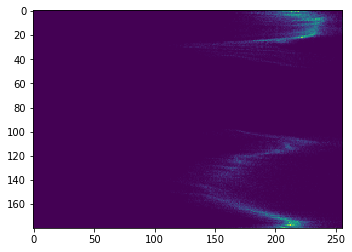

-1

In [23]:
#import stuff
import cv2
import numpy as np
from matplotlib import pyplot as plt
#read image
img = cv2.imread('colors.jpg')
#HSV values for 2D
hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
#Create 2D Histogram
hist = cv2.calcHist( [hsv], [0, 1], None, [180, 256], [0, 180, 0, 256] )
#Plot
plt.imshow(hist,interpolation = 'nearest')
plt.show()
cv2.imshow('image',img)
cv2.waitKey()

# Histogram Back projection

In [4]:
import cv2
import numpy as np

#read reegion of interest
roi = cv2.imread('red.png') 
hsv = cv2.cvtColor(roi,cv2.COLOR_BGR2HSV)

#read target image
target = cv2.imread('colors.jpg')
hsvt = cv2.cvtColor(target,cv2.COLOR_BGR2HSV)

# calculating object histogram
roihist = cv2.calcHist([hsv],[0, 1], None,
                       [180, 256], [0, 180, 0, 256] )

# normalize histogram and apply backprojection
cv2.normalize(roihist,roihist,0,255,
              cv2.NORM_MINMAX)
dst = cv2.calcBackProject([hsvt],[0,1],
                          roihist,[0,180,0,256],1)

# Now convolute with circular disc
disc = cv2.getStructuringElement(
    cv2.MORPH_ELLIPSE,(5,5))
cv2.filter2D(dst,-1,disc,dst)

# threshold and binary AND
ret,thresh = cv2.threshold(dst,50,255,0)
thresh = cv2.merge((thresh,thresh,thresh))
res = cv2.bitwise_and(target,thresh)

res = np.vstack((target,res))
#cv2.imwrite('res.jpg',res)
cv2.imshow('result',res)
cv2.waitKey()

-1